

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº3
#### Angel Joseph Vargas Martinez


# Introducción
### Desparramo Espectral
El desparramo espectral aparece cuando la frecuencia de la senoidal no coincide exactamente con un multiplo entero de la resolucion de DFT($ Δf=F_s/N$), es decir si la frecuencia es exactamente un múltiplo de $Δf$ ($k_0=N/4$) la DFT muestra un pico limpio en un solo bin pero si la frecuencia es un poco mayor o menor  ($k_0 + 0,25 $ o $k_0 + 0,5$) la DFT ya no puede “captarla” en un bin exacto, y distribuye la energia en un lóbulo principal más varios lóbulos laterales.

### Potencia normalizada

Si una señal tiene más o menos amplitud su potencia aumenta o disminuye en proporcion a ello, y para poder comparar señales en igualdad de condiciones, se suele normalizar la potencia, es decir ajustar la amplitud de la señal para que su potencia sea igual a 1.
### Densidad Espectral de Potencia (PSD)

En el tiempo, la potencia de una señal se mide como la media de $x[n]^2$, mientras que en el dominio de la frecuencia, podemos ver cómo se reparte esa potencia a lo largo de las distintas frecuencias a eso se le conoce como la densidad espectral de potencia.

Para una señal discreta la PSD se define como:

$$PSD[k] = \frac{1}{N} \, |X[k]|^2$$

donde $X[k]$ es la DFT de la señal.
### Identidad de Parseval
La identidad de Parseval asegura que analizar la potencia de una señal en el tiempo o en la frecuencia es equivalente, y por eso podemos confiar en usar la PSD para medir potencia o energía sin perder consistencia.
$$\sum_{n=0}^{N-1} |x[n]|^2 \;=\; \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2$$


### Zero Padding
El Zero Padding consiste en prolongar artificialmente la señal mediante la adición de ceros, con el objetivo de incrementar el número de muestras procesadas por la FFT. Esta técnica no modifica la energía de la señal ni reduce el desparramo espectral, ya que no aporta información nueva, pero sí permite obtener un espectro con mayor densidad de puntos en el eje de frecuencia. De esta manera, se logra una representación más detallada y suave del lóbulo principal y de los lóbulos laterales, facilitando la identificación de la frecuencia dominante y el análisis visual del espectro. 

## Analisis y discusion

En esta parte del código defino las librerías y las funciones que voy a utilizar


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

def sen(ff, nn, vmax=np.sqrt(2), dc=0, ph=0, fs=2):
    n = np.arange(0, nn)
    tt = n/fs
    w0 = 2 * np.pi * ff
    xx = dc + vmax * np.sin(w0 * tt + ph)
    return tt, xx


En esta parte se utilizó como $N=1000$ y $Fs=N$, y se generaron señales de acuerdo a las frecuencias pedidas y se normalizaron

Como amplitud de la señal se uso np.sqrt(2), para que la energia este normalizada


In [20]:
N = 1000
Fs = N
df = Fs/N

# Definimos las tres frecuencias pedidas
f1 = (N/4) * df
f2 = (N/4 + 0.25) * df
f3 = (N/4 + 0.5) * df

# %% Señales
_, x1 = sen(ff=f1, nn=N, fs=Fs)
_, x2 = sen(ff=f2, nn=N, fs=Fs)
_, x3 = sen(ff=f3, nn=N, fs=Fs)


x1 = x1 / np.sqrt(np.var(x1))
x2 = x2 / np.sqrt(np.var(x2))
x3 = x3 / np.sqrt(np.var(x3))

Se calculo para cada senoidal su FFT y ese valor se calculo Densidad Espectral de Potencia (PSD)
Despues se graficaron ambas señales


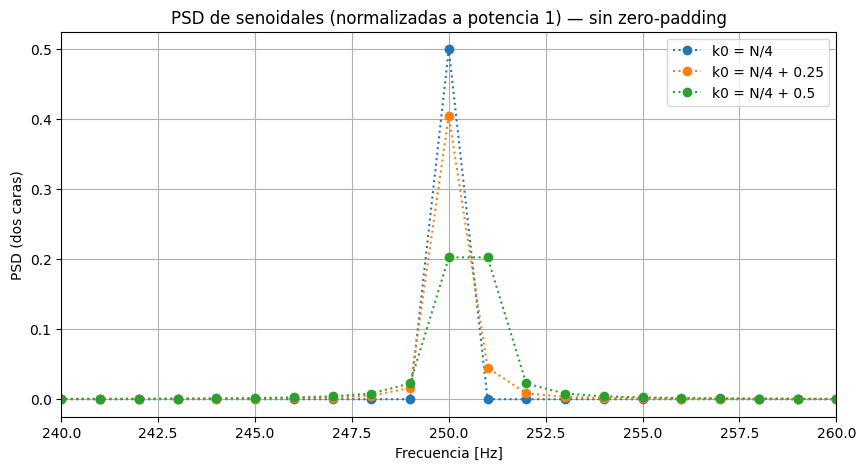

In [21]:
# %% FFT y PSD
X1 = fft(x1); PSD1 = (np.abs(X1)**2) / (N**2)
X2 = fft(x2); PSD2 = (np.abs(X2)**2) / (N**2)
X3 = fft(x3); PSD3 = (np.abs(X3)**2) / (N**2)

frec = np.arange(N) * df

plt.figure(figsize=(10,5))
plt.plot(frec, PSD1, ":o", label="k0 = N/4")
plt.plot(frec, PSD2, ":o", label="k0 = N/4 + 0.25")
plt.plot(frec, PSD3, ":o", label="k0 = N/4 + 0.5")
plt.xlim(240, 260)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PSD (dos caras)")
plt.title("PSD de senoidales (normalizadas a potencia 1) — sin zero-padding")
plt.legend()
plt.grid(True)
plt.show()


Aca se verifica la Identidad de Parseval

In [22]:
Et1 = np.sum(np.abs(x1)**2)
Ef1 = (1/N)*np.sum(np.abs(X1)**2)

Et2 = np.sum(np.abs(x2)**2)
Ef2 = (1/N)*np.sum(np.abs(X2)**2)

Et3 = np.sum(np.abs(x3)**2)
Ef3 = (1/N)*np.sum(np.abs(X3)**2)

print("Verificación de Parseval:")
print(f"La señal k0=N/4   tiene una diferencia de {Et1 - Ef1:.5e}")
print(f"La señal k0=N/4+0.25 tiene una diferencia de {Et2 - Ef2:.5e}")
print(f"La señal k0=N/4+0.5 tiene una diferencia de  {Et3 - Ef3:.5e}")


Verificación de Parseval:
La señal k0=N/4   tiene una diferencia de 1.13687e-13
La señal k0=N/4+0.25 tiene una diferencia de 0.00000e+00
La señal k0=N/4+0.5 tiene una diferencia de  1.13687e-13


En esta parte se aplico el Zero Padding

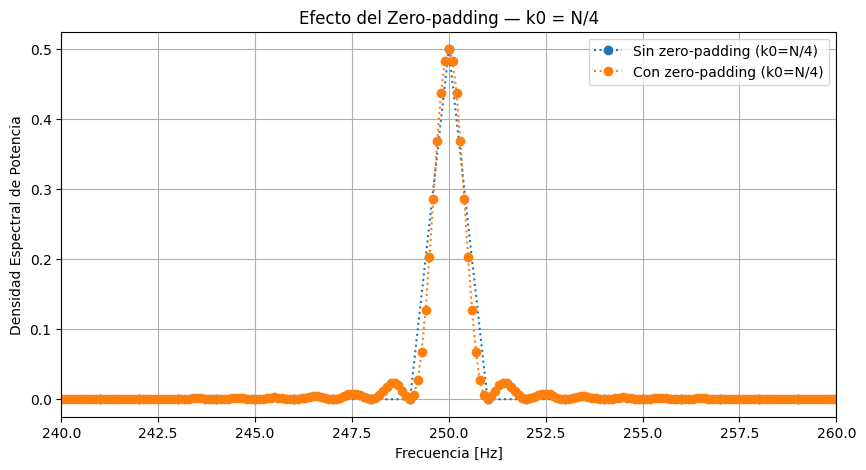

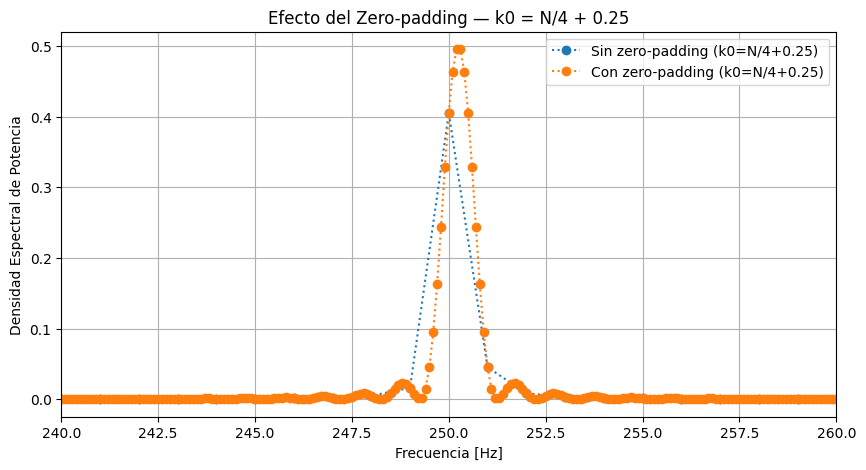

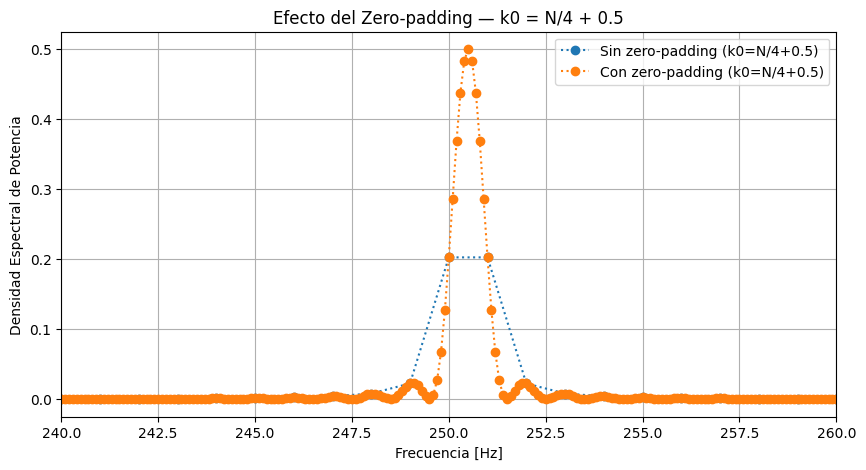

In [29]:
# %% Zero Padding para las tres frecuencias (corregido)
# Agregar 9*N ceros => longitud total = N + 9N = 10N
Npad = 10 * N
frec_pad = np.arange(Npad) * Fs / Npad

# Señal k0 = N/4
X1z = fft(np.pad(x1, (0, Npad - N)))
PSD1z = (np.abs(X1z)**2) / (N**2)   # normalización igual que la original (mantiene amplitud)
# Señal k0 = N/4 + 0.25
X2z = fft(np.pad(x2, (0, Npad - N)))
PSD2z = (np.abs(X2z)**2) / (N**2)
# Señal k0 = N/4 + 0.5
X3z = fft(np.pad(x3, (0, Npad - N)))
PSD3z = (np.abs(X3z)**2) / (N**2)

# %% Gráficos comparativos
plt.figure(figsize=(10,5))
plt.plot(frec, PSD1, ':o', label="Sin zero-padding (k0=N/4)")
plt.plot(frec_pad, PSD1z, ':o', label="Con zero-padding (k0=N/4)")
plt.xlim(240, 260)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad Espectral de Potencia")
plt.title("Efecto del Zero-padding — k0 = N/4")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(frec, PSD2, ':o', label="Sin zero-padding (k0=N/4+0.25)")
plt.plot(frec_pad, PSD2z, ':o', label="Con zero-padding (k0=N/4+0.25)")
plt.xlim(240, 260)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad Espectral de Potencia")
plt.title("Efecto del Zero-padding — k0 = N/4 + 0.25")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(frec, PSD3, ':o', label="Sin zero-padding (k0=N/4+0.5)")
plt.plot(frec_pad, PSD3z, ':o', label="Con zero-padding (k0=N/4+0.5)")
plt.xlim(240, 260)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Densidad Espectral de Potencia")
plt.title("Efecto del Zero-padding — k0 = N/4 + 0.5")
plt.legend()
plt.grid(True)
plt.show()





# Conclusiones 
En la primera parte al analizar el desparramo espectral de las tres senoidales con frecuencias  $N/4$, $N/4+0.25$ y $N/4+0.5$, se observa que cuando la frecuencia coincide exactamente con un múltiplo entero de $Δf$, la energía se concentra en un solo bin de la DFT, mostrando picos bien definidos y sin dispersión.
En cambio, cuando la frecuencia se desintoniza aunque sea ligeramente aparece el efecto de desparramo espectral, la energía no queda en un único bin, sino que se reparte en varios vecinos, generando lóbulos y una menor concentración espectral. Esto ocurre porque la señal no es periódica respecto a la ventana de análisis y la DFT “interpreta” esa discontinuidad como contenido adicional en otras frecuencias.

En la segunda parte se verificó la identidad de Parseval, confirmando que la potencia calculada en el dominio temporal coincide con la medida en el dominio frecuencial. Esto asegura que la DFT no altera la energía total de la señal, solo la redistribuye en frecuencia.

En la ultima parte, al aplicar zero padding (extender la señal con ceros hasta $9N$ muestras), se observó que no se agrega nueva información en frecuencia ni se elimina el desparramo. Sin embargo, la representación espectral se vuelve más suave y detallada: los picos se visualizan con mayor resolución, permitiendo distinguir mejor dónde cae la frecuencia de la senoidal.



# Autoevaluación del aprendizaje
Indicar una opción:

Resolví la tarea con seguridad

**Resolví la tarea, pero tengo dudas**

Resolví la tarea,pero no entendí bien

No pude resolverla y no entendí

Responder:

¿Qué aprendiste al hacer esta tarea?

Aprendi a como sale el desparramo espectral y la realacion con la identidad de Perseval

¿Qué te quedó claro? ¿Qué te sigue costando?

No me quedo muy claro el zero padding

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.** 

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

**Conceptos teorícos**

**Gráficos**

**Conclusiones**.
